 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
whale_returns_csv = Path("./Resources/whale_returns_new.csv")

# Setting the date as index
# whale_df= pd.read_csv(whale_returns_csv, index_col= 'Date', parse_dates= True, infer_datetime_format= True)
whale_df= pd.read_csv(whale_returns_csv, index_col= 'Date', parse_dates= True)
whale_df.sort_index(inplace= True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
# YOUR CODE HERE
whale_ret= whale_df.dropna()
whale_ret.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
whale_ret.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_returns_csv = Path("./Resources/algo_returns.csv")

# Setting the date as index
algo_df= pd.read_csv(algo_returns_csv, index_col= 'Date', parse_dates= True, infer_datetime_format= True)
algo_df.sort_index(inplace= True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_ret= algo_df.dropna()
algo_ret.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
algo_ret.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("./Resources/sp500_history.csv")

# Setting the date as index
sp500_df= pd.read_csv(sp500_history_csv, index_col= 'Date', parse_dates= True, infer_datetime_format= True)
sp500_df.sort_index(inplace= True)
sp500_df.head()

,Close
Date,
2012-10-01,"$1,444.49"
2012-10-02,"$1,445.75"
2012-10-03,"$1,450.99"
2012-10-04,"$1,461.40"
2012-10-05,"$1,460.93"


In [13]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
# Removing the $ sign
sp500_df['Close']= sp500_df['Close'].str.replace("$", "")
sp500_df['Close']= sp500_df['Close'].str.replace(",", "")
sp500_df['Close']

Date
2012-10-01    1444.49 
2012-10-02    1445.75 
2012-10-03    1450.99 
2012-10-04    1461.40 
2012-10-05    1460.93 
                ...   
2019-04-16    2907.06 
2019-04-17    2900.45 
2019-04-18    2905.03 
2019-04-22    2907.97 
2019-04-23    2933.68 
Name: Close, Length: 1649, dtype: object

In [15]:
# Converting the object as a float
sp500_df['Close']= sp500_df['Close'].astype('float')
sp500_df.tail()

,Close
Date,
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03
2019-04-22,2907.97
2019-04-23,2933.68


In [16]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns= sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [17]:
# Drop nulls
sp500_ret= sp500_daily_returns.dropna()
sp500_ret.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [18]:
# Rename Column
sp500_ret= sp500_ret.rename(columns= {'Close': 'S&P 500'})
sp500_ret.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Concatenate all DataFrames into a single DataFrame
combined= pd.concat([whale_ret, algo_ret, sp500_ret], axis= 'columns', join= 'inner')
# combined.sort_index(inplace= True)
combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

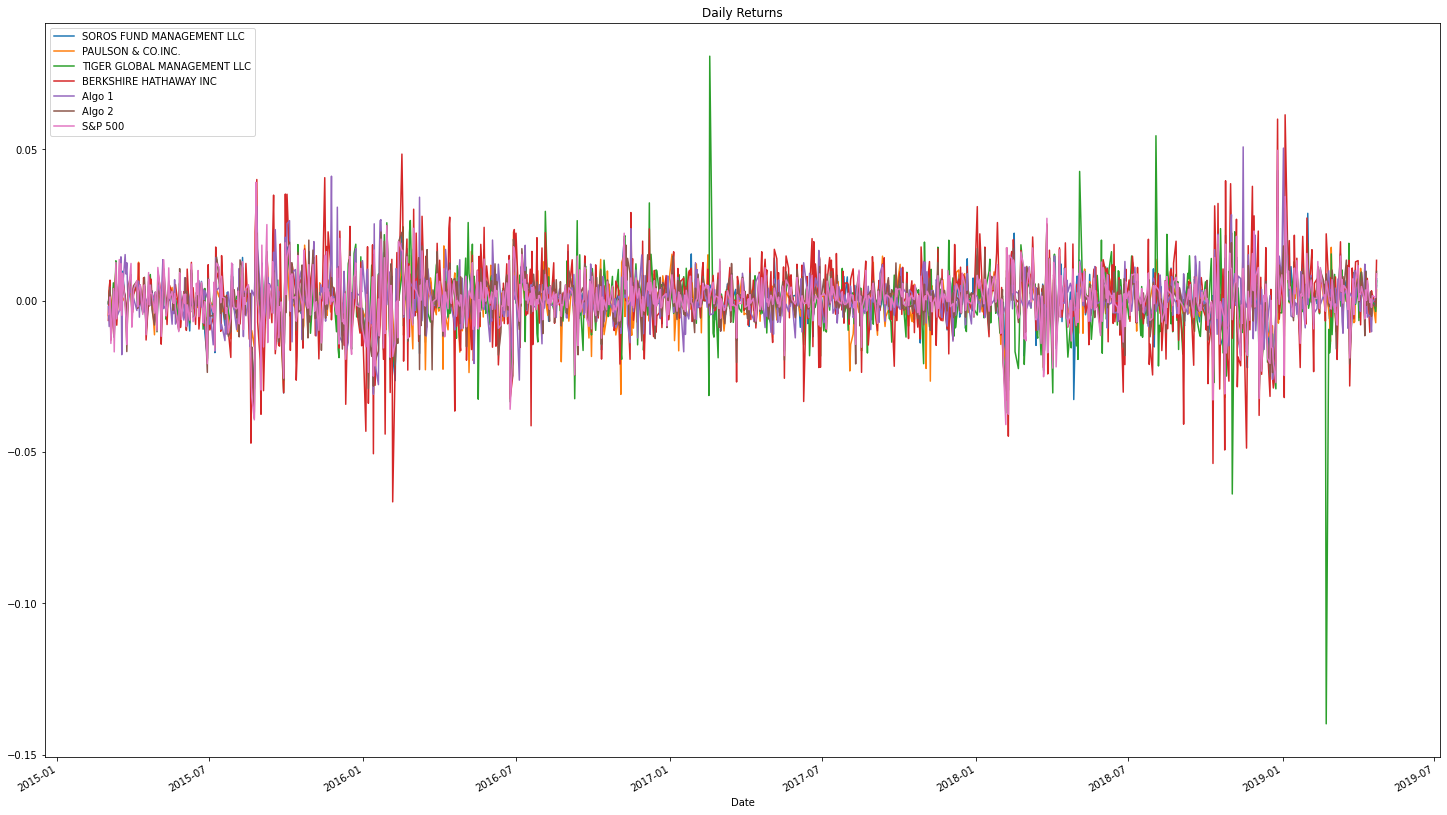

In [20]:
# Plot daily returns
combined.plot(kind= 'line', figsize= (25,15), title= 'Daily Returns')

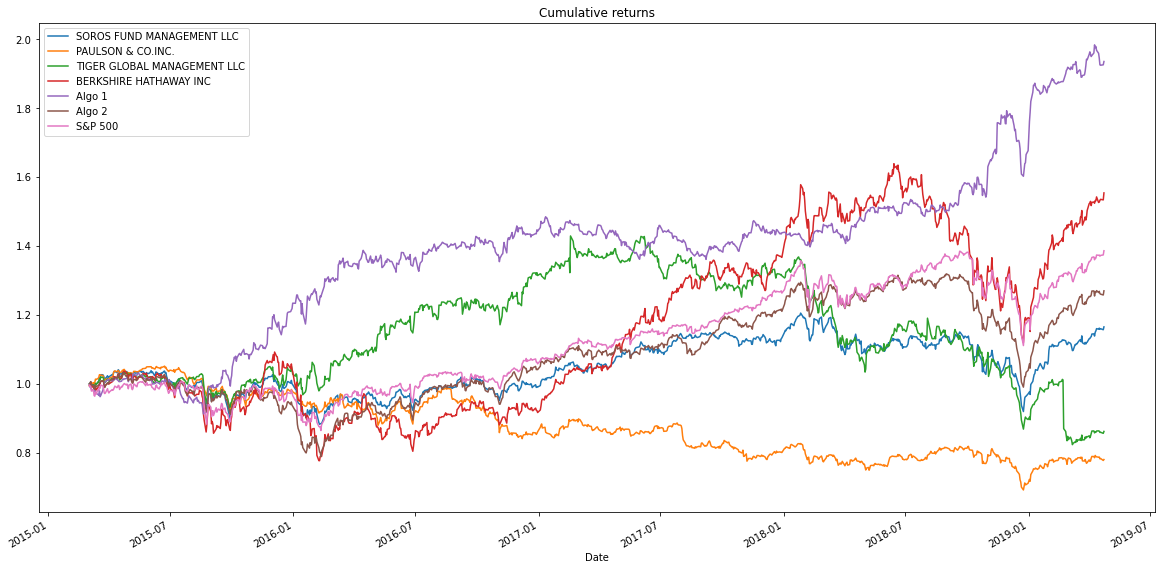

In [21]:
# Plot cumulative returns
cumulative_returns= (1+combined).cumprod()
cumulative_returns.plot(title= 'Cumulative returns', figsize= (20,10))

Interpretation from the graph:
- Algo 1 has been consistently outperforming the S&P 500 by a significant margin.
- While Tiger Global was beating the market from Jul 2015 until Jan 2018, its returns dropped steadily since then.
- Berkshire Hathaway had a rollercoaster ride. It fared better than the standard in Jan 2016 and then had a sub-par performance until catching up with the S&P in Jul 2017. From Jul 2017, Berkshire's return was on a steady rise and then dived below the benchmark from late 2018. It again had superior returns than the market from Jan 2019 until Jul 2017.
- Soros Fund and Paulson INC. delivered lackluster returns.

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

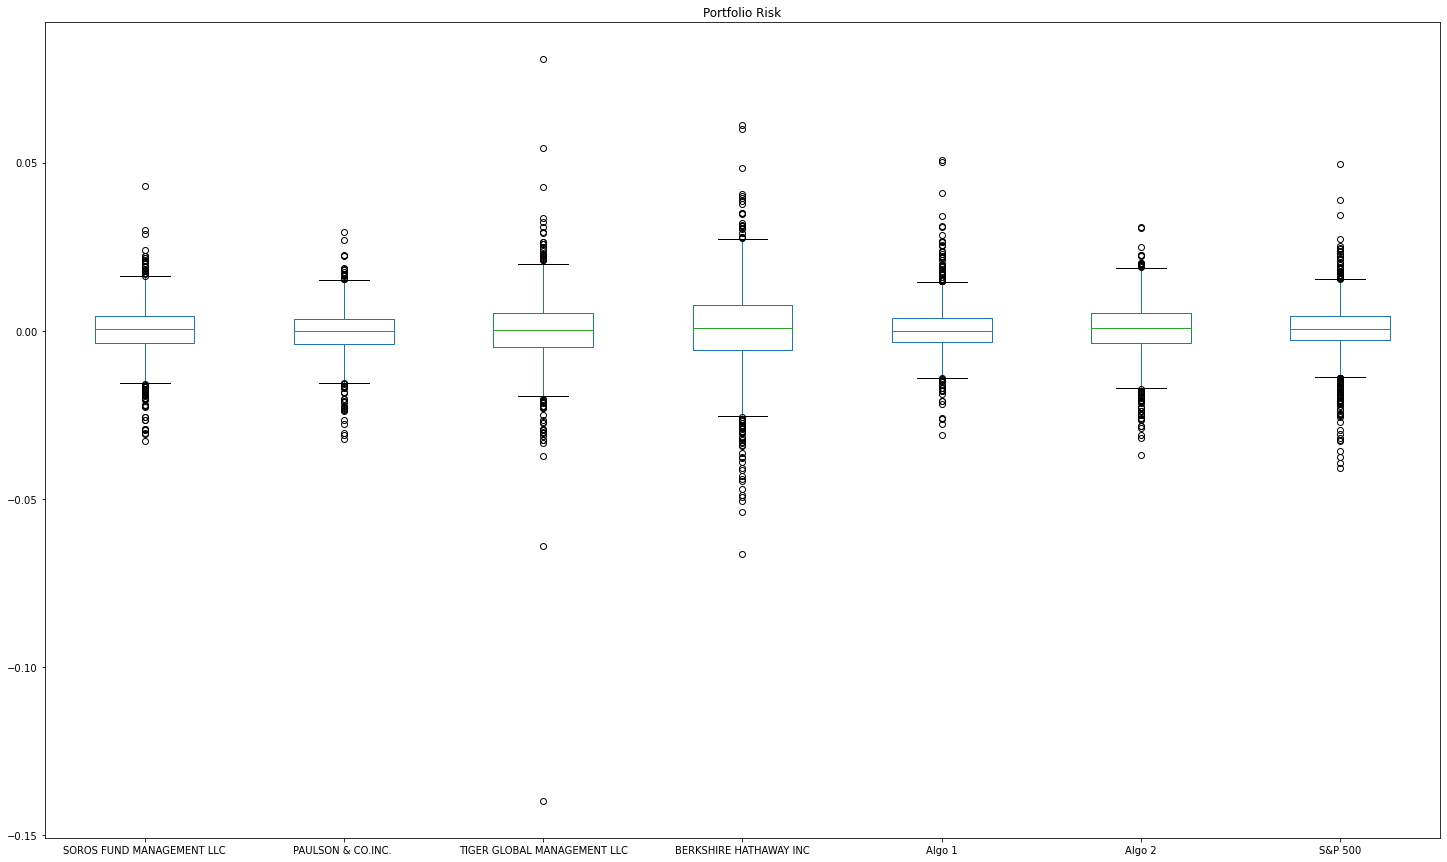

In [22]:
####
# Box plot to visually show risk
combined.plot(kind= 'box', title= 'Portfolio Risk', figsize= (25,15))

In [23]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
combined_std= combined.std()
combined_std.sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [24]:
# Determine which portfolios are riskier than the S&P 500
combined_std> combined_std['S&P 500']

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

Interpretation from the Box plot and standard deviation:
- Form the Box plot, it could be seen that Tiger Global and Berkshire Hathaway have a higher standard deviation than the S&P and therefore are riskier investments.
- Its also inferred that that Tiger Global and Berkshire have a lot of outliers in the data

In [25]:
# Calculate the annualized standard deviation (252 trading days)
combined_std252= combined.std()*np.sqrt(252)
combined_std252.sort_values()

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

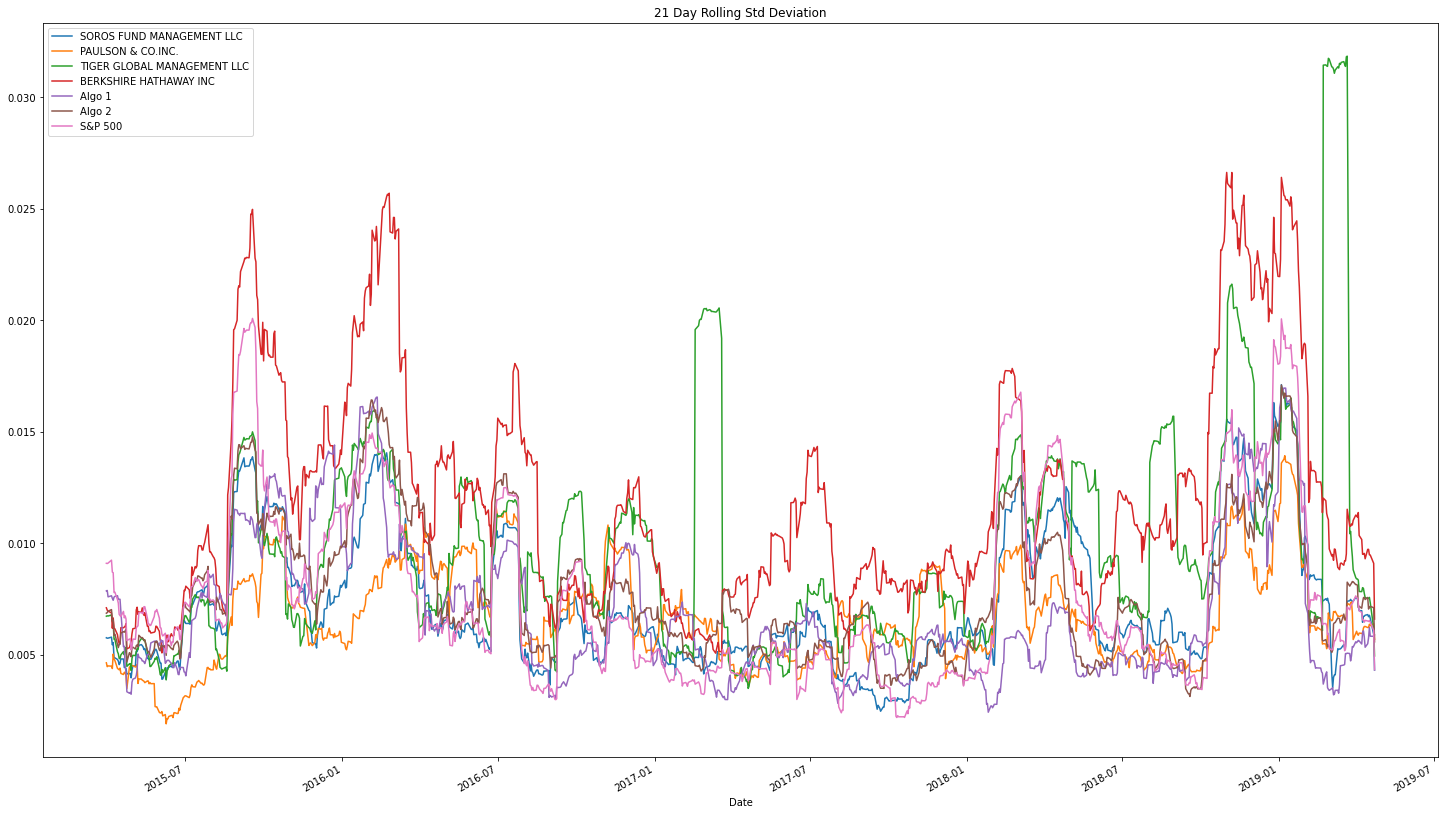

In [26]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

# ax= combined['SOROS FUND MANAGEMENT LLC'].rolling(window= 21).std().plot(figsize= (20,15), title= '21 Day Rolling Std Deviation', legend= 'SOROS FUND MANAGEMENT LLC')

# combined['PAULSON & CO.INC.'].rolling(window= 21).std().plot(ax= ax, legend= 'PAULSON') #### KEY ERROR 'PAULSON...'

# combined['TIGER GLOBAL MANAGEMENT LLC'].rolling(window= 21).std().plot(ax= ax, legend= 'TIGER GLOBAL MANAGEMENT LLC')

# combined['BERKSHIRE HATHAWAY INC'].rolling(window= 21).std().plot(ax= ax, legend= 'BERKSHIRE HATHAWAY INC')

# combined['Algo 1'].rolling(window= 21).std().plot(ax= ax, legend= 'Algo 1')

# combined['Algo 2'].rolling(window= 21).std().plot(ax= ax, legend= 'Algo 2')

# combined['S&P 500'].rolling(window= 21).std().plot(ax= ax, legend= 'S&P 500')

combined.rolling(window= 21).std().plot(figsize= (25,15), title= '21 Day Rolling Std Deviation')

# Inferences from the 21-day rolling Std Deviation graph
- Berkshire Hathaway poses the greatest risk in comparison with their counterparts. It has been highly sensitive to the movements in S&P.
- In general, from the plot, it could be understood that all the portfolios are indeed correlated with the riskiness of the S&P.
- Tiger Global's movements have been quite haphazard.

In [27]:
# Construct a correlation table
correlation= combined.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


## Inferences from the correlation table
- Algo 2 portfolio has the biggest positive correlation with the market, closely followed by Soros Fund.
- The riskiest portfolio, Berkshire Hathaway also has a strong direct correlation with the S&P.
- Tiger Global has a fairly positive sensitivity towards the benchmark
- Algo 1 has a weak direct relationship with the market.

In [28]:
# Calculate Beta for a Algo 1 portfolio compared to the total market (S&P 500)
algo1_covar= combined['Algo 1'].rolling(window= 21).cov(combined['S&P 500'])
algo1_covar

Date
2015-03-03             NaN
2015-03-04             NaN
2015-03-05             NaN
2015-03-06             NaN
2015-03-09             NaN
                  ...     
2019-04-16   -2.373358e-06
2019-04-17   -6.544879e-07
2019-04-18   -2.742914e-06
2019-04-22   -2.321653e-06
2019-04-23    7.170526e-07
Length: 1043, dtype: float64

In [29]:
# Calculate the variance of S&P 500
variance= combined['S&P 500'].rolling(window=21).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000042
2019-04-17    0.000043
2019-04-18    0.000042
2019-04-22    0.000037
2019-04-23    0.000019
Name: S&P 500, Length: 1043, dtype: float64

In [30]:
# Calculate the Beta for Algo 1
beta= algo1_covar/variance
beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16   -0.056215
2019-04-17   -0.015315
2019-04-18   -0.065531
2019-04-22   -0.062526
2019-04-23    0.038336
Length: 1043, dtype: float64

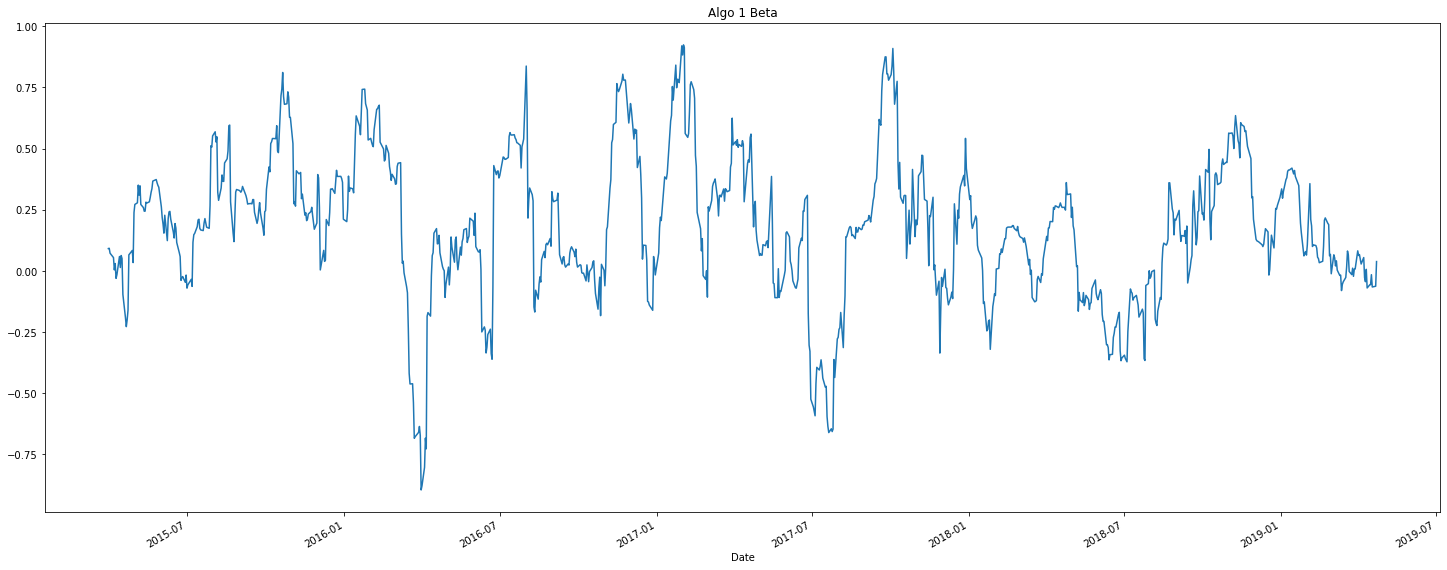

In [31]:
# Plotting the Beta of Algo 1
beta.plot(title= 'Algo 1 Beta', figsize= (25,10))

## How to interpret the above graph?

In [32]:
# Calculate mean returns, using the Exponentially Weighted Moving Average(EWMA) for a 21-day halflife. 
combined_rolling_ewm= combined.ewm(halflife= 21).std()
combined_rolling_ewm

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


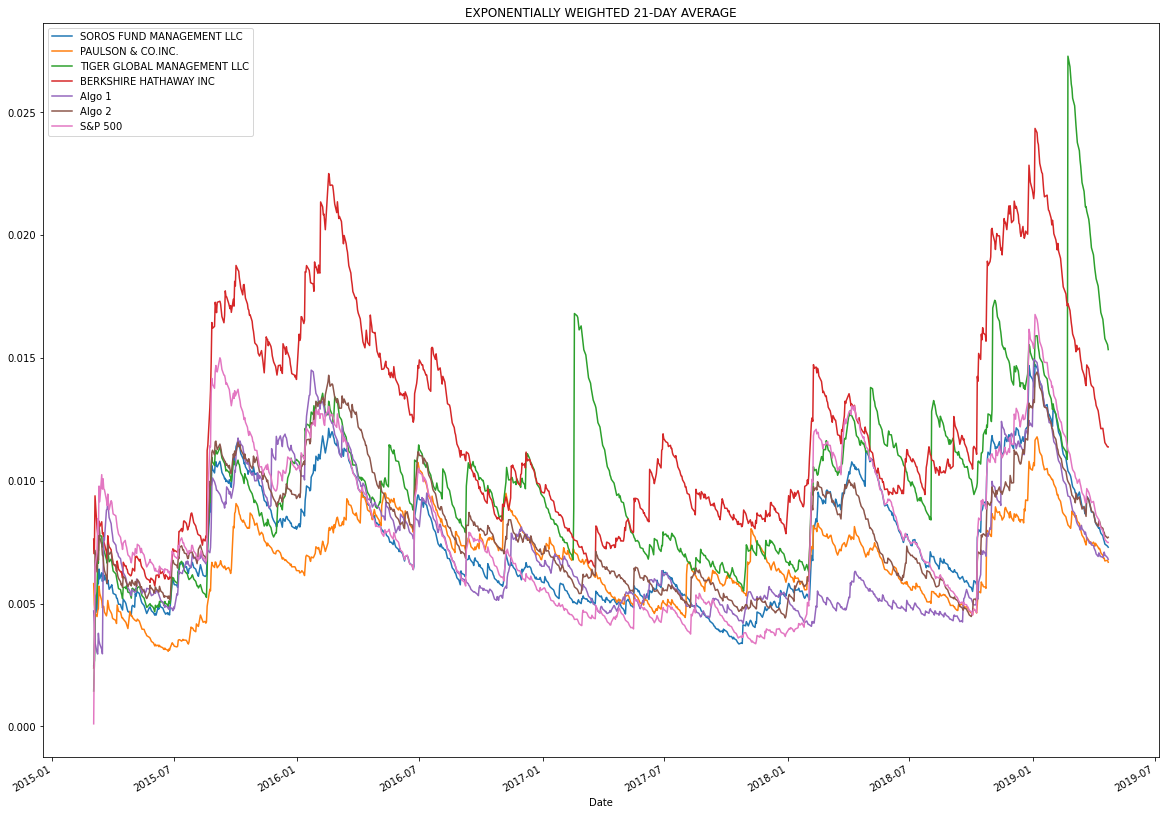

In [33]:
# Plot the EWMA with a 21 day halflife
combined_rolling_ewm.plot(figsize= (20,15), title= 'EXPONENTIALLY WEIGHTED 21-DAY AVERAGE')

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [34]:
# Calculating the annual mean return
combined_annual_mean_ret= combined.mean()*252
combined_annual_mean_ret.sort_values()

PAULSON & CO.INC.             -0.053912
TIGER GLOBAL MANAGEMENT LLC   -0.020936
SOROS FUND MANAGEMENT LLC      0.044672
Algo 2                         0.066395
S&P 500                        0.088026
BERKSHIRE HATHAWAY INC         0.127519
Algo 1                         0.166771
dtype: float64

In [35]:
#Calculate annualized Sharpe Ratios
sharpe_ratios= (combined_annual_mean_ret)/(combined_std252)
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

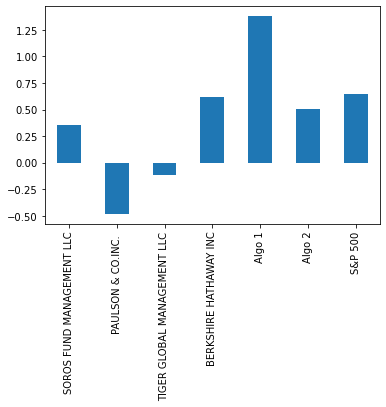

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind= 'bar')

## Sharpe ratios- Interpretation
- Algo 1 crushes the market and the whales, delivering superior returns.
- Berkshire Hathaway's Return on Investment is as close as the benchmark
- Soros and Algo 2 fall short of the S&P, while still perfoming better than Paulson and Tiger.
- Paulson and Tiger Global offered negative returns.

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Read the first stock
amd_returns_csv = Path("./Resources/amd_historical.csv")

# Setting the date as index
amd_df= pd.read_csv(amd_returns_csv, index_col= 'Date', parse_dates= True, infer_datetime_format= True)
amd_df.head()

,Close
Date,
2015-01-05,2.66
2015-01-06,2.63
2015-01-07,2.58
2015-01-08,2.61
2015-01-09,2.63


In [38]:
# Renaming the 'Close' column to AMD
amd_df= amd_df.rename(columns= {'Close':'AMD'})
amd_df.head()

,AMD
Date,
2015-01-05,2.66
2015-01-06,2.63
2015-01-07,2.58
2015-01-08,2.61
2015-01-09,2.63


In [39]:
# Read the second stock
nflx_returns_csv = Path("./Resources/nflx_historical.csv")

# Setting the date as index
nflx_df= pd.read_csv(nflx_returns_csv, index_col= 'Date', parse_dates= True, infer_datetime_format= True)
nflx_df.head()

,Close
Date,
2015-05-01,47.31
2015-06-01,46.50
2015-07-01,46.74
2015-08-01,47.78
2015-09-01,47.04


In [40]:
# Renaming the 'Close' column to NFLX
nflx_df= nflx_df.rename(columns= {'Close':'NFLX'})
nflx_df.head()

,NFLX
Date,
2015-05-01,47.31
2015-06-01,46.50
2015-07-01,46.74
2015-08-01,47.78
2015-09-01,47.04


In [41]:
# Read the third stock
tsla_returns_csv = Path("./Resources/tsla_historical.csv")

# Setting the date as index
tsla_df= pd.read_csv(tsla_returns_csv, index_col= 'Date', parse_dates= True, infer_datetime_format= True)
tsla_df.head()

,Close
Date,
2015-05-01,42.02
2015-06-01,42.26
2015-07-01,42.19
2015-08-01,42.12
2015-09-01,41.33


In [42]:
# Renaming the 'Close' column to TSLA
tsla_df= tsla_df.rename(columns= {'Close':'TSLA'})
tsla_df.head()

,TSLA
Date,
2015-05-01,42.02
2015-06-01,42.26
2015-07-01,42.19
2015-08-01,42.12
2015-09-01,41.33


In [43]:
# Concatenate all stocks into a single DataFrame
my_combined= pd.concat([amd_df, nflx_df, tsla_df], axis= 'columns', join= 'inner')
my_combined.sort_index(inplace= True)
my_combined.head()

,AMD,NFLX,TSLA
Date,,,
2015-01-05,2.66,79.58,45.21
2015-01-06,2.63,89.00,49.89
2015-01-07,2.58,93.64,53.83
2015-01-09,2.63,105.79,47.73
2015-01-12,2.63,125.37,47.44


In [44]:
# Calculate the returns for the custom portfolio
my_combined_ret= my_combined.pct_change()
my_combined_ret.head()

,AMD,NFLX,TSLA
Date,,,
2015-01-05,NaN,NaN,NaN
2015-01-06,-0.011278,0.118371,0.103517
2015-01-07,-0.019011,0.052135,0.078974
2015-01-09,0.019380,0.129752,-0.113320
2015-01-12,0.000000,0.185084,-0.006076


In [46]:
# Reset the index
# Done

In [47]:
# Pivot so that each column of prices represents a unique symbol
# Already in the proper format

In [48]:
# Count and Drop Nulls
my_combined_ret.isnull().sum()

my_combined_ret= my_combined_ret.dropna()

my_combined_ret.isnull().sum()

AMD     0
NFLX    0
TSLA    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [49]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

my_combined_ret_weighted= my_combined_ret.dot(weights)
my_combined_ret_weighted.head()

Date
2015-01-06    0.070203
2015-01-07    0.037366
2015-01-09    0.011937
2015-01-12    0.059669
2015-01-13   -0.252839
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [58]:
# Add your "Custom" portfolio to the larger dataframe of fund returns

all_portfolios= pd.concat([combined, my_combined_ret_weighted], axis= 'columns', join= 'inner')
all_portfolios.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
Date,,,,,,,,
2019-04-04,0.001255,0.010630,0.008459,-0.008037,-0.003597,0.003265,0.002085,-0.003707
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,-0.039135
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.026133
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.012189
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.010033


In [59]:
# Renaming the column 0:
all_portfolios= all_portfolios.rename(columns= {0: 'Custom'})
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.022946
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,0.162413
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.042501
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918,-0.032108
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601,0.081417


In [60]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [61]:
# Risk
all_portfolios_std252= all_portfolios.std()*np.sqrt(252)
all_portfolios_std252.sort_values()

PAULSON & CO.INC.              0.111926
Algo 1                         0.122740
SOROS FUND MANAGEMENT LLC      0.128179
Algo 2                         0.134077
S&P 500                        0.137705
TIGER GLOBAL MANAGEMENT LLC    0.176324
BERKSHIRE HATHAWAY INC         0.209707
Custom                         0.979827
dtype: float64

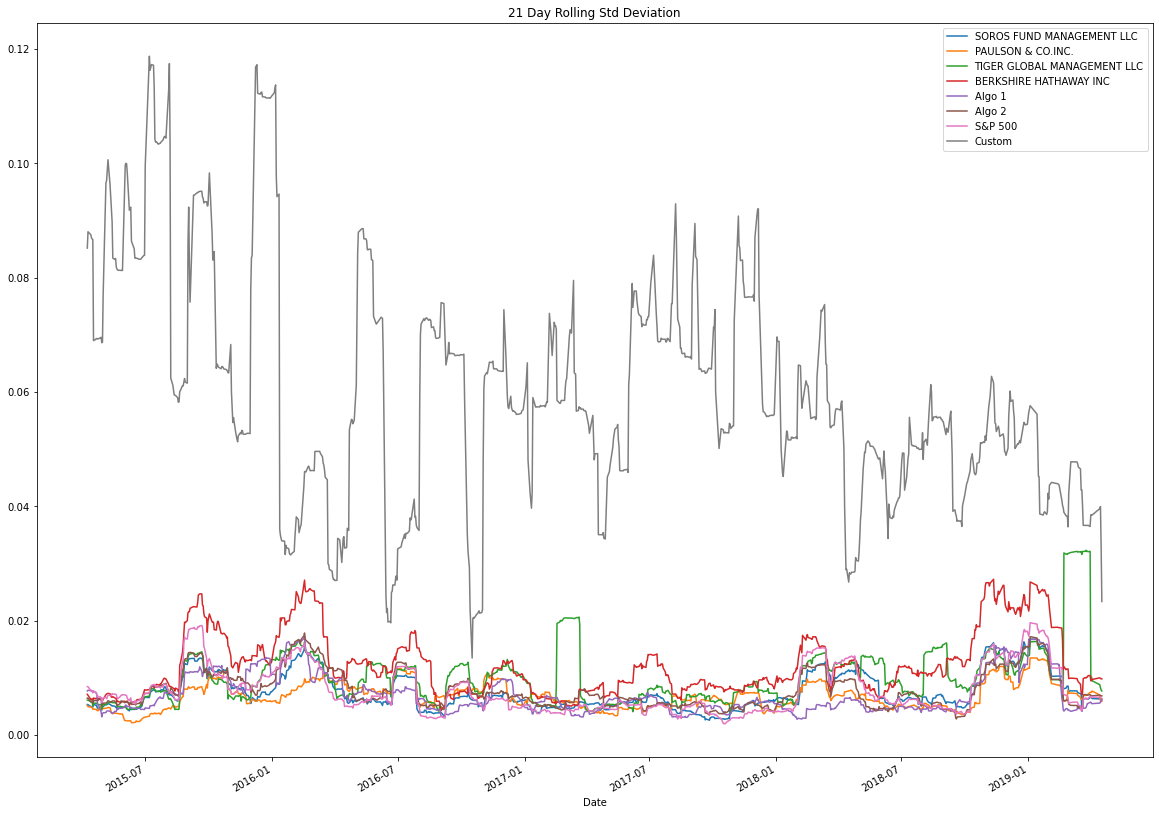

In [62]:
# Rolling 21-day standard deviation of the Whales, Algo, S&P and custom portfolios
all_portfolios.rolling(window= 21).std().plot(figsize= (20,15), title= '21 Day Rolling Std Deviation')

## Rolling 21-day Std Deviation interpretation
The custom portfolio is massively risky

In [63]:
# Annualized Sharpe Ratios
custom_sharpe_ratio= all_portfolios.mean()*252/all_portfolios_std252
custom_sharpe_ratio.sort_values()

PAULSON & CO.INC.             -0.605352
TIGER GLOBAL MANAGEMENT LLC    0.040163
SOROS FUND MANAGEMENT LLC      0.085995
BERKSHIRE HATHAWAY INC         0.277376
Algo 2                         0.278231
S&P 500                        0.437862
Algo 1                         1.312439
Custom                         1.598814
dtype: float64

## Sharpe ratios- results
Even though the custom portfolio poses a great amount of risk, it has a tremendous sharpe ratio of 1.59 and I would put my money on the custom portfolio.

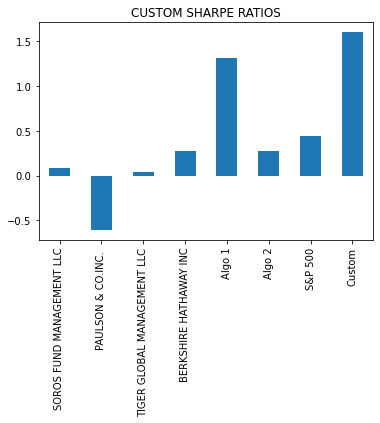

In [64]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe_ratio.plot(kind= 'bar', title= 'CUSTOM SHARPE RATIOS')

In [65]:
# Create a correlation analysis
correlation= all_portfolios.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.711179,0.563016,0.762813,0.326751,0.834298,0.848027,0.157810
PAULSON & CO.INC.,0.711179,1.000000,0.445697,0.571137,0.284442,0.702087,0.693039,0.093285
TIGER GLOBAL MANAGEMENT LLC,0.563016,0.445697,1.000000,0.420060,0.167615,0.511531,0.622171,0.101022
BERKSHIRE HATHAWAY INC,0.762813,0.571137,0.420060,1.000000,0.305352,0.699151,0.762785,0.191832
Algo 1,0.326751,0.284442,0.167615,0.305352,1.000000,0.292589,0.285215,-0.009038
Algo 2,0.834298,0.702087,0.511531,0.699151,0.292589,1.000000,0.865415,0.149198
S&P 500,0.848027,0.693039,0.622171,0.762785,0.285215,0.865415,1.000000,0.146272
Custom,0.157810,0.093285,0.101022,0.191832,-0.009038,0.149198,0.146272,1.000000


## Custom portfolio vs Market
The relationship between the custom portfolio and S&P 500 is non linear. 

In [66]:
# Covariance of Custom portfolio vs S&P 500
custom_covar= all_portfolios['Custom'].rolling(window= 21).cov(all_portfolios['S&P 500'])
custom_covar

Date
2015-03-03             NaN
2015-03-06             NaN
2015-03-09             NaN
2015-03-11             NaN
2015-03-12             NaN
                  ...     
2019-04-04   -4.945107e-06
2019-04-15   -1.091898e-07
2019-04-16   -1.470886e-06
2019-04-17    3.021664e-05
2019-04-18    5.698795e-05
Length: 904, dtype: float64

In [67]:
# Variance of S&P 500
sp_500variance= all_portfolios['S&P 500'].rolling(window=21).var()
sp_500variance

Date
2015-03-03         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-11         NaN
2015-03-12         NaN
                ...   
2019-04-04    0.000044
2019-04-15    0.000044
2019-04-16    0.000043
2019-04-17    0.000042
2019-04-18    0.000041
Name: S&P 500, Length: 904, dtype: float64

In [73]:
# Beta of Custom portfolio
custom_beta= custom_covar/sp_500variance
custom_beta

Date
2015-03-03         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-11         NaN
2015-03-12         NaN
                ...   
2019-04-04   -0.113165
2019-04-15   -0.002498
2019-04-16   -0.034358
2019-04-17    0.719609
2019-04-18    1.402352
Length: 904, dtype: float64

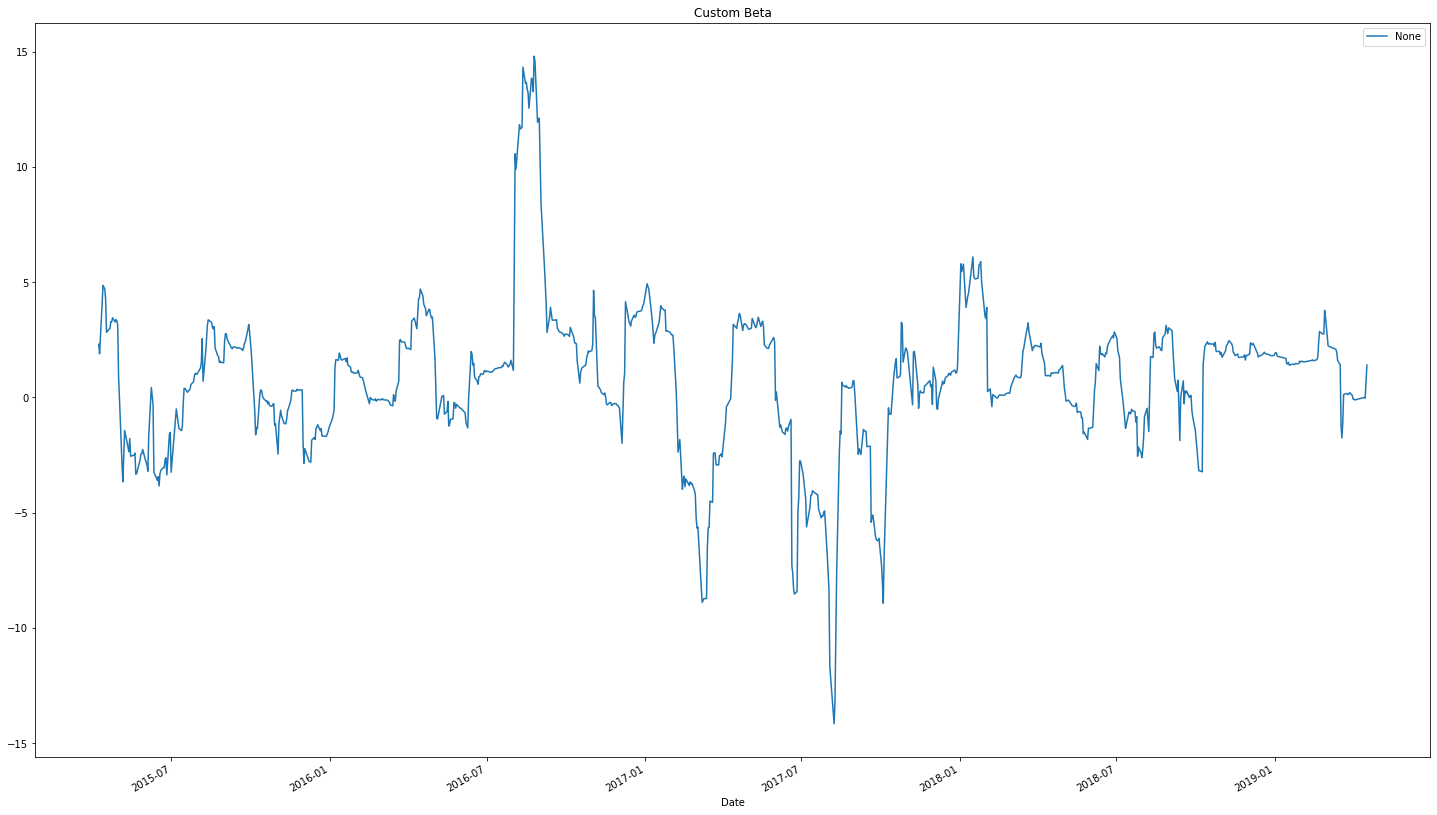

In [77]:
# Plotting Custom Beta
ax= custom_beta.plot(figsize= (25,15), title= 'Custom Beta')